## Machine Learning end to end Project

In [3]:
import os
import tarfile
from six.moves import urllib

In [4]:
import pandas as pd
HOUSING_PATH=r"D:\Machine Learning\datasets\housing"
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


In [5]:
housing=load_housing_data(HOUSING_PATH)

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EAB136EE08>,
      dtype=object)

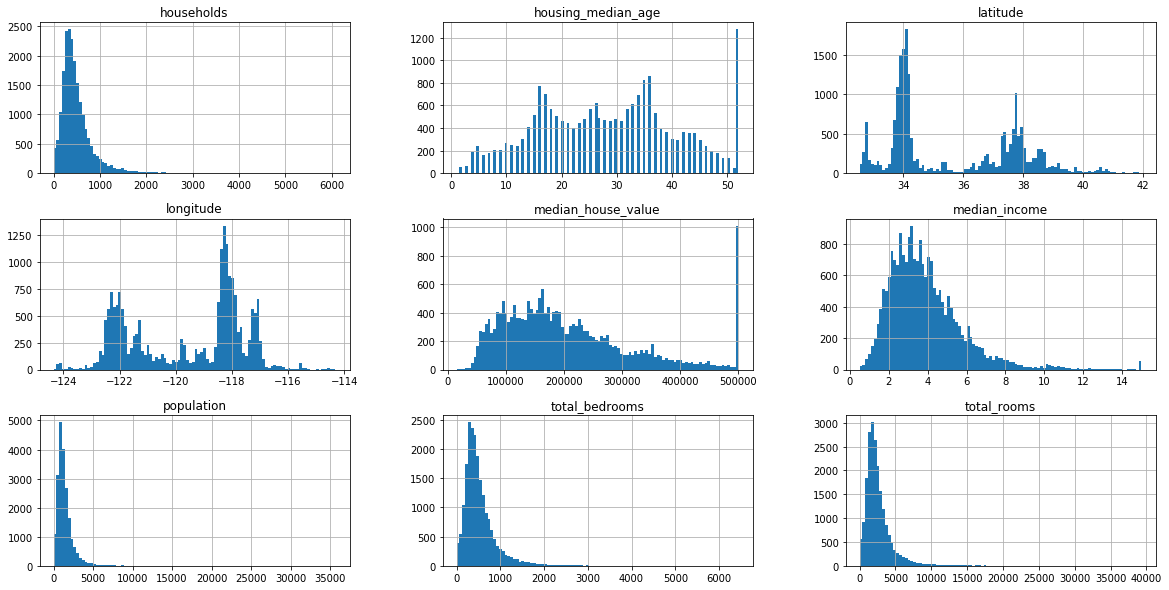

In [11]:
housing.hist(bins=100,figsize=(20,10))

In [12]:
import numpy as np

In [13]:
housing["income_cat"]=pd.cut(housing["median_income"],bins=[0.,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])

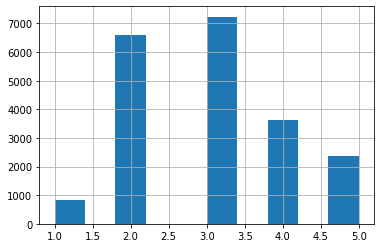

In [14]:
housing["income_cat"].hist()

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
statifiedShuffleSplit=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

In [16]:
for train_index,test_index in statifiedShuffleSplit.split(housing,housing["income_cat"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [17]:
print("size of training set:{0} and test set:{1}".format(strat_train_set.shape,strat_test_set.shape))

size of training set:(16512, 11) and test set:(4128, 11)


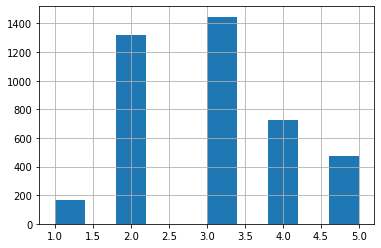

In [18]:
strat_test_set["income_cat"].hist()

In [19]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

In [31]:
housing=strat_train_set.copy()

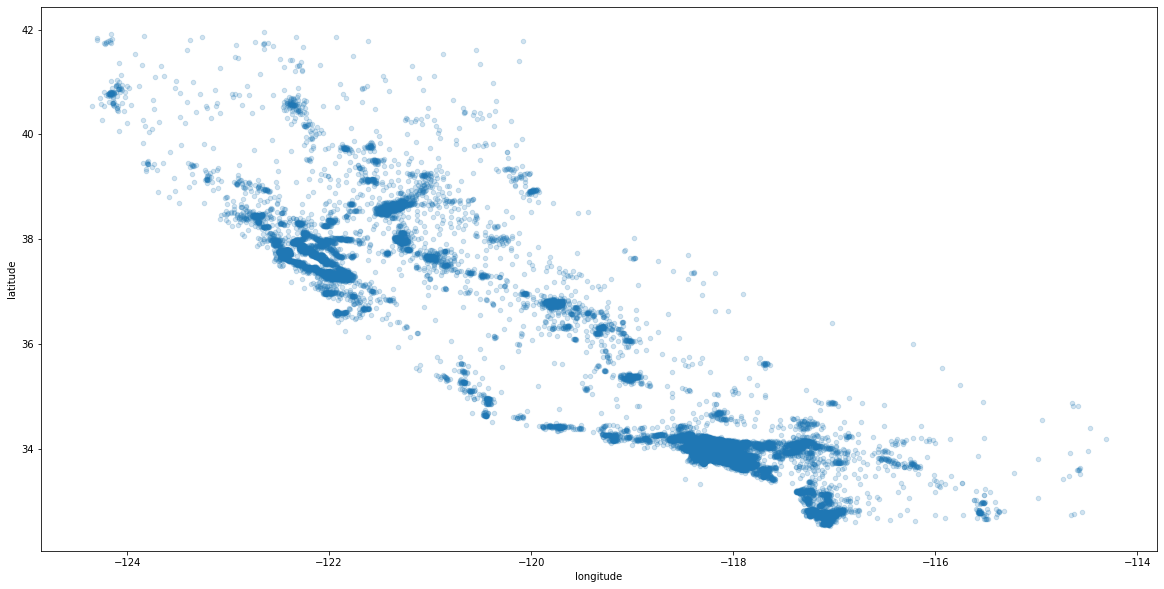

In [32]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.2,figsize=(20,10))

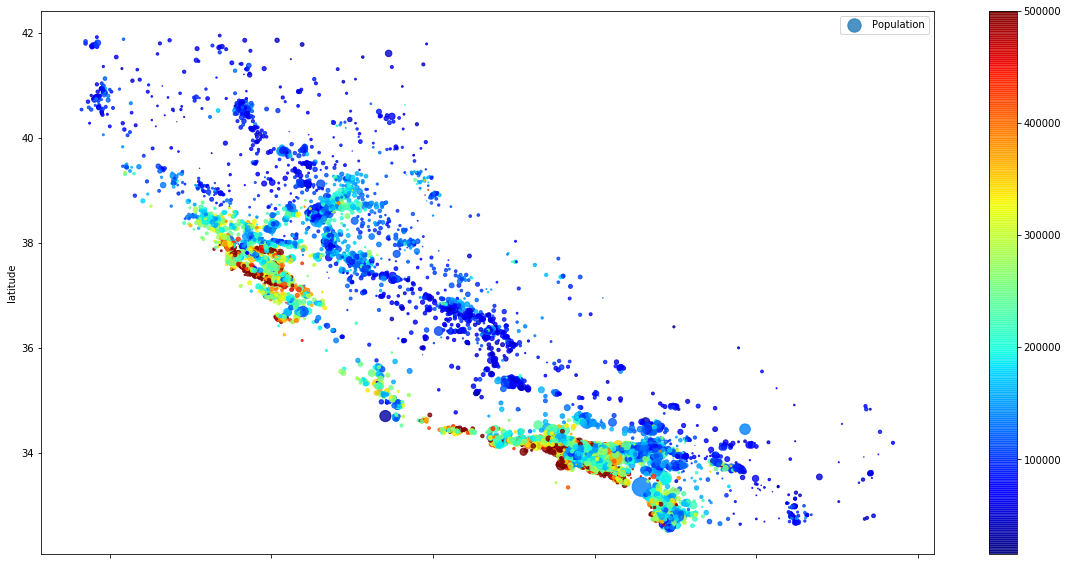

In [33]:
housing.plot(kind="scatter",x="longitude",y="latitude",s=housing["population"]/100,c=housing["median_house_value"],cmap=plt.get_cmap("jet"),colorbar=True,label="Population",alpha=0.8,figsize=(20,10))
plt.legend()

In [34]:
housing_corr=housing.corr()

In [36]:
housing_corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [37]:
from pandas.plotting import scatter_matrix

In [38]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [39]:
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EAB5F00D48>,
      dtype=object)

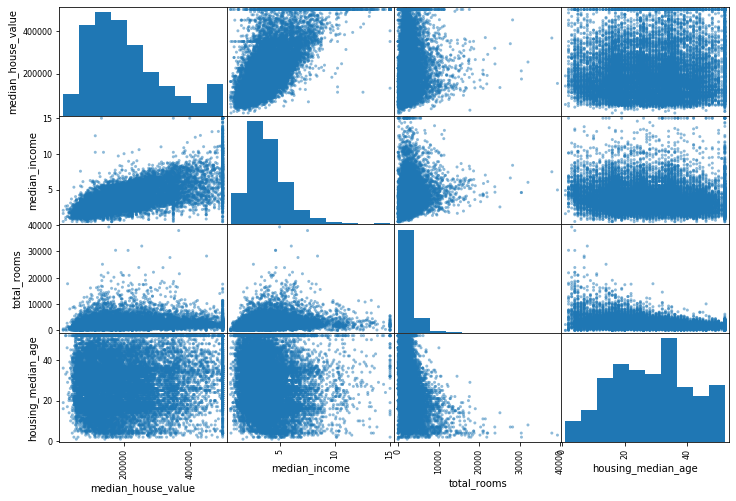

In [40]:
scatter_matrix(housing[attributes],figsize=(12,8))

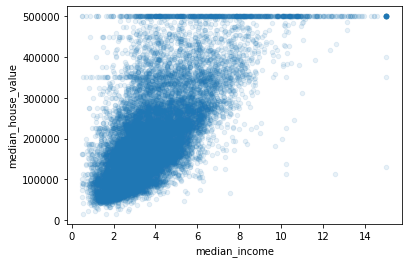

In [42]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

In [43]:
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [44]:
corr_matrix=housing.corr()

In [46]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## Prepare Data for Machine Learning

In [58]:
housing=strat_train_set.drop("median_house_value",axis=1)
housing_label=strat_train_set["median_house_value"].copy()

In [59]:
print("Shape of independent variable {0}: and dependent variable :{1}".format(housing.shape,housing_label.shape))

Shape of independent variable (16512, 9): and dependent variable :(16512,)


In [61]:
from sklearn.impute import SimpleImputer

In [62]:
imputer=SimpleImputer(strategy="median")

In [63]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [64]:
housing_num=housing.drop("ocean_proximity",axis=1)

In [66]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [68]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [69]:
housing_num.median()

longitude             -118.5100
latitude                34.2600
housing_median_age      29.0000
total_rooms           2119.5000
total_bedrooms         433.0000
population            1164.0000
households             408.0000
median_income            3.5409
dtype: float64

In [70]:
X=imputer.transform(housing_num)

In [71]:
housing_tr=pd.DataFrame(X,columns=housing_num.columns)

In [73]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


In [88]:
from sklearn.base import BaseEstimator,TransformerMixin

In [89]:
rooms_idx,bedrooms_idx,population_idx,households_idx=3,4,5,6

In [97]:
class CombinedAttributeAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household=X[:,rooms_idx]/X[:,households_idx]
        populations_per_household=X[:,population_idx]/X[:,households_idx]
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:,bedrooms_idx]/X[:,rooms_idx]
            return np.c_[X,rooms_per_household,populations_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,populations_per_household]
            
        
    

In [98]:
attr_adder=CombinedAttributeAdder(add_bedrooms_per_room=False)

In [99]:
housing_extra_attr=attr_adder.transform(housing.values)

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [105]:
num_pipeline=Pipeline([('imputer',SimpleImputer(strategy="median")),
                       ('attributes_adder',CombinedAttributeAdder()),
                       ('std_Scaler',StandardScaler()),
                      ])

In [106]:
housing_num_tr=num_pipeline.fit_transform(housing_num)

In [107]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [111]:
from sklearn.compose import ColumnTransformer

In [112]:
num_attributes=list(housing_num)

In [113]:
cat_attributes=["ocean_proximity"]

In [114]:
from sklearn.preprocessing import OneHotEncoder

In [119]:
full_pipelines=ColumnTransformer([("num",num_pipeline,num_attributes),("cat",OneHotEncoder(),cat_attributes)])

In [120]:
housing_prepared=full_pipelines.fit_transform(housing)

In [121]:
from sklearn.linear_model import LinearRegression
liner_regression=LinearRegression()
liner_regression.fit(housing_prepared,housing_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [122]:
from sklearn.metrics import mean_squared_error

In [125]:
housing_lr_prediction=liner_regression.predict(housing_prepared)

In [126]:
rmse_housing_lr=np.sqrt(mean_squared_error(housing_label,housing_lr_prediction))

In [127]:
print("Root mean squared error :{0}.".format(rmse_housing_lr))

Root mean squared error :68628.19819848923.


In [128]:
from sklearn.tree import DecisionTreeRegressor

In [129]:
decision_tree_regressor=DecisionTreeRegressor()

In [130]:
decision_tree_regressor.fit(housing_prepared,housing_label)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [131]:
housing_dtr_prediction=decision_tree_regressor.predict(housing_prepared)

In [132]:
rmse_housing_dtr=np.sqrt(mean_squared_error(housing_label,housing_dtr_prediction))

In [133]:
print("Root mean square of Decision tree regressor:{0}".format(rmse_housing_dtr))

Root mean square of Decision tree regressor:0.0


In [135]:
from sklearn.model_selection import cross_val_score

In [136]:
score=cross_val_score(decision_tree_regressor,housing_prepared,housing_label,scoring="neg_mean_squared_error",cv=10)

In [137]:
tree_rmse_score=np.sqrt(-score)

In [138]:
print("Root mean square error :{0} after 10 cross fold validation".format(tree_rmse_score))

Root mean square error :[68260.50380579 68454.31967736 70803.14239853 68949.85273491
 70736.77966674 75448.58418422 70368.81481285 70912.34998001
 76347.87952826 69920.31935998] after 10 cross fold validation


In [139]:
def display_score(scores):
    print("Scores:{0}\nMean Score:{1}\nStandard Deviation:{2}".format(scores,scores.mean(),scores.std()))

In [141]:
display_score(tree_rmse_score)

Scores:[68260.50380579 68454.31967736 70803.14239853 68949.85273491
 70736.77966674 75448.58418422 70368.81481285 70912.34998001
 76347.87952826 69920.31935998]
Mean Score:71020.25461486456
Standard Deviation:2612.5441837504154


In [142]:
score_linearRegression=cross_val_score(liner_regression,housing_prepared,housing_label,scoring="neg_mean_squared_error",cv=10)

In [143]:
linear_rmse_score=np.sqrt(-score_linearRegression)

In [144]:
display_score(linear_rmse_score)

Scores:[66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean Score:69052.46136345083
Standard Deviation:2731.674001798349


In [145]:
from sklearn.ensemble import RandomForestRegressor

In [146]:
randomForestRegressor=RandomForestRegressor()

In [147]:
randomForestRegressor.fit(housing_prepared,housing_label)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [148]:
score_random_forest=cross_val_score(randomForestRegressor,housing_prepared,housing_label,scoring="neg_mean_squared_error",cv=10)

In [149]:
random_forest_regressor_score=np.sqrt(-score_random_forest)


In [151]:
display_score(random_forest_regressor_score)

Scores:[49630.43451855 47789.00523377 50118.07598364 52470.58768968
 48958.12345424 53243.00560044 48938.73357908 47912.42055887
 53152.21313766 49646.47414935]
Mean Score:50185.9073905276
Standard Deviation:1947.9604971815963


## To save trained ML model we can use joblib function.

In [153]:
from sklearn.externals import joblib

In [154]:
joblib.dump(liner_regression,"LinearRegression.pkl")
joblib.dump(decision_tree_regressor,"DecisionTreeRegressor.pkl")
joblib.dump(randomForestRegressor,"RandomForestRegressor.pkl")

['RandomForestRegressor.pkl']

## To load saved machine learning model we can call method

In [155]:
my_model=joblib.load("LinearRegression.pkl")